In [2]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

arena_local_planner_drl_folder_path = '/home/michael/catkin_ws/src/arena-rosnav/arena_navigation/arena_local_planner/learning_based/arena_local_planner_drl'

# Evaluation of MPC DRL training run

In [3]:
logs_mpc = np.load(os.path.join(arena_local_planner_drl_folder_path, 'training_logs/train_eval_log/pretrained_ppo_mpc/evaluations.npz'))
avg_success = np.sum(logs_mpc['successes'], axis = 1) / 40
avg_success

array([0.5  , 0.575, 0.35 , 0.55 , 0.425, 0.3  , 0.45 , 0.4  , 0.375,
       0.4  , 0.15 , 0.2  , 0.25 , 0.175, 0.25 , 0.375, 0.2  , 0.2  ,
       0.35 , 0.1  , 0.2  , 0.3  , 0.375, 0.35 , 0.3  , 0.225, 0.2  ,
       0.225, 0.225, 0.225, 0.3  , 0.375, 0.125, 0.2  , 0.35 , 0.15 ,
       0.225, 0.15 , 0.15 , 0.05 , 0.225, 0.15 , 0.125, 0.025, 0.175,
       0.05 , 0.075, 0.025, 0.   , 0.05 , 0.025, 0.15 , 0.025, 0.05 ,
       0.025, 0.   , 0.025, 0.025, 0.025, 0.025, 0.   , 0.05 , 0.025,
       0.   , 0.025, 0.025])

In [4]:
avg_success_df = pd.DataFrame(avg_success, columns=['avg_success'])
avg_success_df

,avg_success
0,0.500
1,0.575
2,0.350
3,0.550
4,0.425
...,...
61,0.050
62,0.025
63,0.000
64,0.025


In [5]:
sns.set_theme(context='paper')

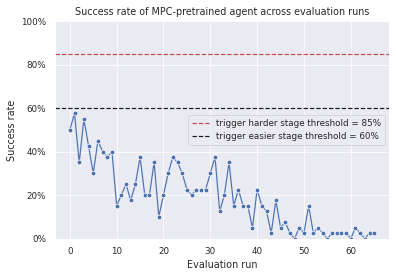

In [47]:
sns.lineplot(x=avg_success_df.index, y='avg_success', data=avg_success_df, marker='o', linestyle='-').set(title='Success rate of MPC-pretrained agent across evaluation runs', xlabel='Evaluation run', ylabel='Success rate')
ax = plt.gca()
ax.axhline(y=0.85, color='r', ls='--', label='trigger harder stage threshold = 85%')
ax.axhline(y=0.6, color='k', ls='--', label='trigger easier stage threshold = 60%')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.savefig('success-eval-mpc.png', dpi=300)

# Evaluation of human expert DRL training run

## success rate vs eval run (from evaluations.npz)

In [7]:
logs_pretrained_human = np.load(os.path.join(arena_local_planner_drl_folder_path, 'training_logs/train_eval_log/pretrained_ppo_human/evaluations.npz'))
avg_success_pretrained_human = np.sum(logs_pretrained_human['successes'], axis = 1) / 40
avg_success_pretrained_human

array([0.9  , 0.8  , 0.75 , 0.9  , 0.75 , 0.725, 0.775, 0.875, 0.725,
       0.725, 0.775, 0.75 , 0.775, 0.825, 0.775, 0.75 , 0.8  , 0.8  ,
       0.625, 0.775, 0.725, 0.75 , 0.75 , 0.7  , 0.675, 0.7  , 0.8  ,
       0.775, 0.775, 0.775, 0.75 , 0.75 , 0.675, 0.85 , 0.775, 0.7  ,
       0.725, 0.7  , 0.7  , 0.725, 0.65 , 0.8  , 0.775, 0.725, 0.825,
       0.8  , 0.75 , 0.7  , 0.75 , 0.775, 0.7  , 0.775, 0.75 , 0.75 ,
       0.85 , 0.675, 0.8  , 0.775, 0.7  , 0.75 , 0.7  , 0.775, 0.625,
       0.775, 0.8  , 0.7  , 0.675, 0.725, 0.85 , 0.65 , 0.75 , 0.775,
       0.725, 0.75 , 0.725, 0.85 , 0.8  , 0.7  , 0.625, 0.75 , 0.75 ,
       0.8  , 0.75 ])

In [8]:
avg_success_df_pretrained_human = pd.DataFrame(avg_success_pretrained_human, columns=['avg_success'])
avg_success_df_pretrained_human

,avg_success
0,0.900
1,0.800
2,0.750
3,0.900
4,0.750
...,...
78,0.625
79,0.750
80,0.750
81,0.800


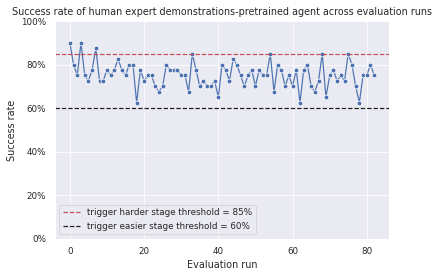

In [48]:
sns.lineplot(x=avg_success_df_pretrained_human.index, y='avg_success', data=avg_success_df_pretrained_human, marker='o', linestyle='-').set(title='Success rate of human expert demonstrations-pretrained agent across evaluation runs', xlabel='Evaluation run', ylabel='Success rate')
ax = plt.gca()
ax.axhline(y=0.85, color='r', ls='--', label='trigger harder stage threshold = 85%')
ax.axhline(y=0.6, color='k', ls='--', label='trigger easier stage threshold = 60%')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.savefig('success-eval-pretrained_human.png', dpi=300)

# Evaluation of baseline agent (trained from scratch with DRL)

## success rate vs eval run (from evaluations.npz)

In [10]:
logs_baseline_human = np.load(os.path.join(arena_local_planner_drl_folder_path, 'training_logs/train_eval_log/baseline_ppo_human/evaluations.npz'))
avg_success_baseline_human = np.sum(logs_baseline_human['successes'], axis = 1) / 40
avg_success_baseline_human

array([0.   , 0.275, 0.6  , 0.825, 0.875, 0.75 , 0.85 , 0.625, 0.6  ,
       0.775, 0.725, 0.7  , 0.8  , 0.775, 0.725, 0.65 , 0.925, 0.75 ,
       0.65 , 0.825, 0.675, 0.675, 0.775, 0.8  , 0.9  , 0.675, 0.75 ,
       0.625, 0.875, 0.8  , 0.825, 0.725, 0.775, 0.7  , 0.825, 0.875,
       0.85 , 0.75 , 0.7  , 0.825, 0.7  , 0.775, 0.725, 0.7  , 0.775,
       0.8  , 0.775, 0.875, 0.725, 0.775, 0.775, 0.825, 0.75 , 0.85 ,
       0.8  , 0.75 , 0.875, 0.775, 0.775, 0.925])

In [11]:
avg_success_df_baseline_human = pd.DataFrame(avg_success_baseline_human, columns=['avg_success'])
avg_success_df_baseline_human

,avg_success
0,0.000
1,0.275
2,0.600
3,0.825
4,0.875
5,0.750
6,0.850
7,0.625
8,0.600
9,0.775


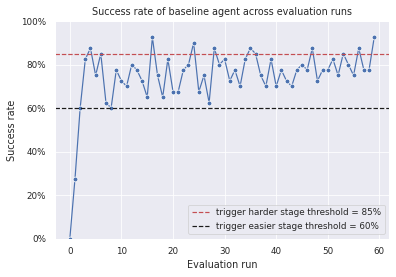

In [46]:
sns.lineplot(x=avg_success_df_baseline_human.index, y='avg_success', data=avg_success_df_baseline_human, marker='o', linestyle='-').set(title='Success rate of baseline agent across evaluation runs', xlabel='Evaluation run', ylabel='Success rate')
ax = plt.gca()
ax.axhline(y=0.85, color='r', ls='--', label='trigger harder stage threshold = 85%')
ax.axhline(y=0.6, color='k', ls='--', label='trigger easier stage threshold = 60%')
#ax.axhline(y=0.90, color='y', ls='--', label='final success threshold = 90%')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.savefig('success-eval-baseline.png', dpi=300)

# Compare number of evals spent in each training stage

In [88]:
def compute_stages_array(avg_success_array):
    curr_stage = 1
    stages = []
    for avg_success in avg_success_array:
        if avg_success >= 0.85:
            curr_stage = np.clip(curr_stage + 1, 1, 5)
        if avg_success <= 0.6:
            curr_stage = np.clip(curr_stage - 1, 1, 5)
        stages.append(curr_stage)
    stages = np.array(stages)
    return stages

In [94]:
stages_baseline = compute_stages_array(avg_success_baseline_human)
stages_df_baseline = pd.DataFrame(stages_baseline, columns=['training_stage'])
stages_df_baseline

,training_stage
0,1
1,1
2,1
3,1
4,2
5,2
6,3
7,3
8,2
9,2


In [100]:
stages_pretrained = compute_stages_array(avg_success_pretrained_human)
stages_df_pretrained = pd.DataFrame(stages_pretrained, columns=['training_stage'])
stages_df_pretrained

,training_stage
0,2
1,2
2,2
3,3
4,3
...,...
78,5
79,5
80,5
81,5


In [112]:
stages_combined = pd.DataFrame(data=[stages_baseline, stages_pretrained]).T
stages_combined.columns = ['baseline', 'pretrained']
stages_combined

,baseline,pretrained
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,3.0
4,2.0,3.0
...,...,...
78,NaN,5.0
79,NaN,5.0
80,NaN,5.0
81,NaN,5.0


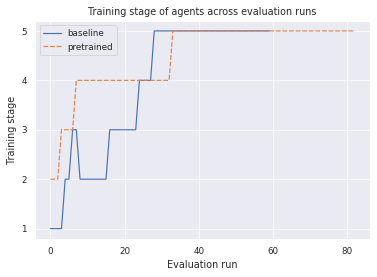

In [119]:
sns.lineplot(data=stages_combined).set(title='Training stage of agents across evaluation runs', xlabel='Evaluation run', ylabel='Training stage')
ax = plt.gca()
ax.set_yticks(range(1,6))
plt.legend()
plt.savefig('stage-eval-comparison.png', dpi=300)

In [121]:
stages_combined

,baseline,pretrained
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,3.0
4,2.0,3.0
...,...,...
78,NaN,5.0
79,NaN,5.0
80,NaN,5.0
81,NaN,5.0


In [149]:
baseline_frequencies = stages_combined.baseline.value_counts(sort=False)
pretrained_frequencies = stages_combined.pretrained.value_counts(sort=False)
frequencies_df = pd.DataFrame(data=[baseline_frequencies, pretrained_frequencies]).T
frequencies_df

,baseline,pretrained
1.0,4.0,NaN
2.0,10.0,3.0
3.0,10.0,4.0
4.0,4.0,26.0
5.0,32.0,50.0


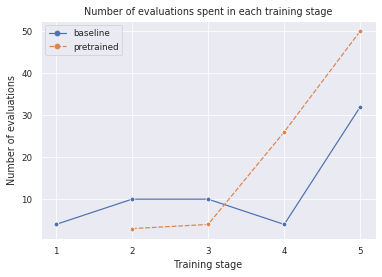

In [174]:
sns.lineplot(data=frequencies_df, markers='oo').set(title='Number of evaluations spent in each training stage', xlabel='Training stage', ylabel='Number of evaluations')
ax = plt.gca()
ax.set_xticks(range(1,6))
plt.legend()
plt.savefig('num_eval-per-stage-comparison.png', dpi=300)